In [1]:
# 📌 STEP 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 📌 STEP 2: Load the Dataset
# Upload your CSV in Google Colab using:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("/content/Loan.csv")  # Make sure filename matches
df.head()


Saving Loan.csv to Loan (1).csv


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [3]:
# 📌 STEP 3: Feature Selection & Preprocessing
features = ["Age", "AnnualIncome", "EducationLevel", "CreditScore", "EmploymentStatus"]
target = "LoanApproved"

# Keep only relevant columns
data = df[features + [target]].copy()

# Encode categorical features
label_encoders = {}
for col in ["EducationLevel", "EmploymentStatus"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define X and y
X = data.drop(target, axis=1)
y = data[target]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# 📌 STEP 4: Train Models

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


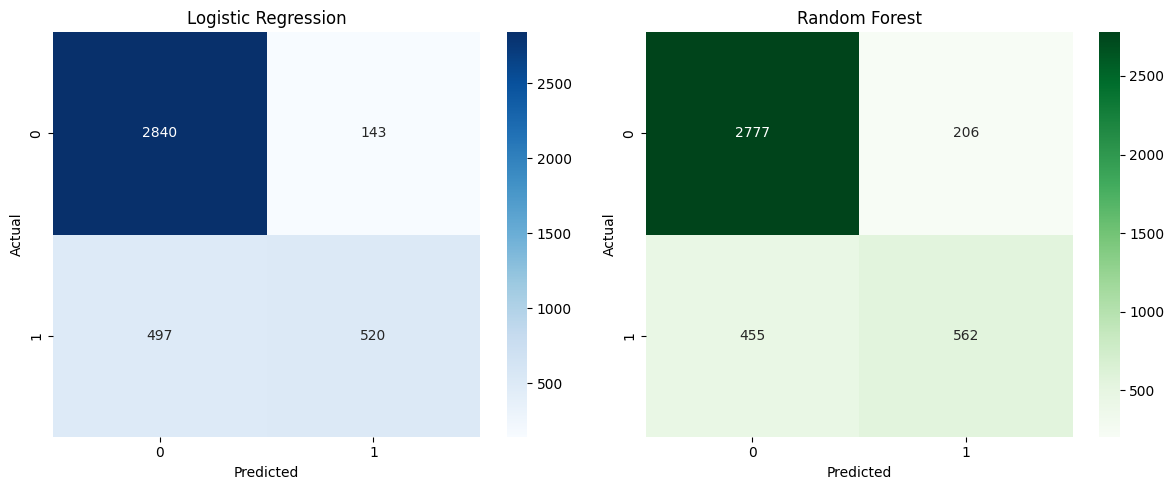

=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2983
           1       0.78      0.51      0.62      1017

    accuracy                           0.84      4000
   macro avg       0.82      0.73      0.76      4000
weighted avg       0.83      0.84      0.83      4000

=== Random Forest Report ===
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2983
           1       0.73      0.55      0.63      1017

    accuracy                           0.83      4000
   macro avg       0.80      0.74      0.76      4000
weighted avg       0.83      0.83      0.83      4000



In [5]:
# 📌 STEP 5: Evaluation - Confusion Matrix & Classification Report

# Confusion Matrices
cm_log = confusion_matrix(y_test, y_pred_log)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Classification Reports
print("=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_log))

print("=== Random Forest Report ===")
print(classification_report(y_test, y_pred_rf))


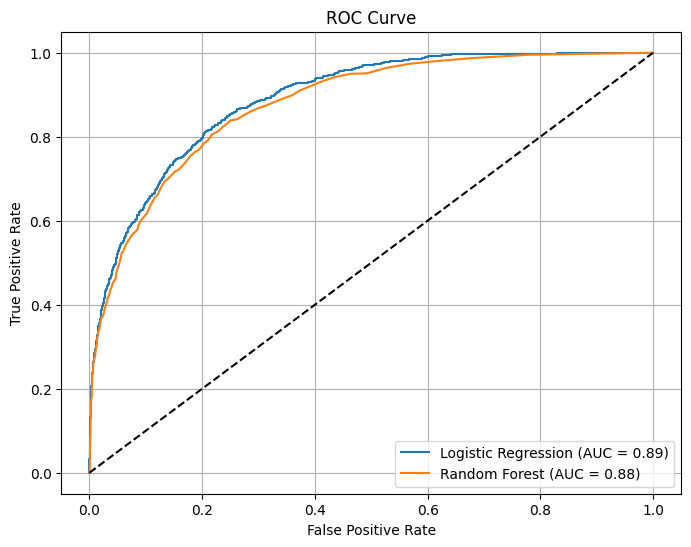

In [6]:
# 📌 STEP 6: ROC Curve
y_prob_log = log_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc(fpr_log, tpr_log):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


=== Combined Model Report ===
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2983
           1       0.77      0.53      0.63      1017

    accuracy                           0.84      4000
   macro avg       0.81      0.74      0.76      4000
weighted avg       0.83      0.84      0.83      4000



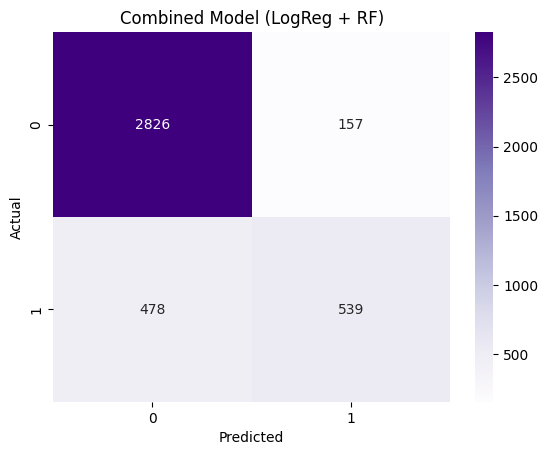

In [7]:
# 📌 Combine both models using soft voting
combined_prob = (y_prob_log + y_prob_rf) / 2
combined_pred = (combined_prob >= 0.5).astype(int)

# Evaluation of combined model
print("=== Combined Model Report ===")
print(classification_report(y_test, combined_pred))

# Confusion matrix
cm_combined = confusion_matrix(y_test, combined_pred)
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Purples')
plt.title("Combined Model (LogReg + RF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [8]:
# 📌 Predict on a sample row using both models and combine result
sample = np.array([[30, 55000, 1, 720, 0]])  # Example: Age, Income, Edu, CreditScore, EmploymentStatus

# Individual probabilities
log_p = log_model.predict_proba(sample)[0][1]
rf_p = rf_model.predict_proba(sample)[0][1]

# Soft voting (average)
final_prob = (log_p + rf_p) / 2
final_pred = 1 if final_prob >= 0.5 else 0

print("Logistic Probability:", log_p)
print("Random Forest Probability:", rf_p)
print("Combined Probability:", final_prob)
print("Final Prediction:", "✅ Approved" if final_pred else "❌ Not Approved")


Logistic Probability: 0.25127973863907604
Random Forest Probability: 0.38
Combined Probability: 0.315639869319538
Final Prediction: ❌ Not Approved


In [9]:
class CombinedLoanModel:
    def __init__(self, log_model, rf_model, encoders):
        self.log_model = log_model
        self.rf_model = rf_model
        self.encoders = encoders

    def predict(self, raw_input):  # expects list like [age, income, education, score, employment]
        edu = self.encoders["EducationLevel"].transform([raw_input[2]])[0]
        emp = self.encoders["EmploymentStatus"].transform([raw_input[4]])[0]
        input_data = np.array([[raw_input[0], raw_input[1], edu, raw_input[3], emp]])
        log_p = self.log_model.predict_proba(input_data)[0][1]
        rf_p = self.rf_model.predict_proba(input_data)[0][1]
        final_prob = (log_p + rf_p) / 2
        final_pred = int(final_prob >= 0.5)
        return final_pred, final_prob


In [10]:
import pickle

final_model = CombinedLoanModel(log_model, rf_model, label_encoders)

with open("combined_model.pkl", "wb") as f:
    pickle.dump(final_model, f)
